## Preparação do ambiente

### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Dataframes

***Lendo os arquivos***

In [2]:
df1 = pd.read_json('data-sample_data-nyctaxi-trips-2009-json_corrigido.json',  lines = True)
df2 = pd.read_json('data-sample_data-nyctaxi-trips-2010-json_corrigido.json',  lines = True)
df3 = pd.read_json('data-sample_data-nyctaxi-trips-2011-json_corrigido.json',  lines = True)
df4 = pd.read_json('data-sample_data-nyctaxi-trips-2012-json_corrigido.json',  lines = True)

***Colocando todos os dados em um mesmo DataFrame***

In [3]:
df_all = pd.concat([df1, df2, df3, df4])
df_all.shape

(4000000, 17)

***Visualizando DataFrame***

In [4]:
df_all.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,NaN,NaN,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,NaN,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4
2,VTS,2009-01-06T19:30:44.142187+00:00,2009-01-06T19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,NaN,NaN,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1
3,VTS,2009-09-24T08:28:09.004451+00:00,2009-09-24T08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,NaN,NaN,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4
4,VTS,2009-10-29T05:50:39.214629+00:00,2009-10-29T05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,NaN,NaN,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2


In [5]:
df_all.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             float64
store_and_fwd_flag    float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

***Convertendo variável Dropoff para o mesmo tipo da variável Pickup***

In [6]:
df_all['dropoff_datetime'] = df_all['dropoff_datetime'].astype('datetime64[ns, UTC]')

***Convertendo variáveis para Datetime a fim de permitir a manipulação dos dados***

In [7]:
df_all['pickup_datetime'] = pd.to_datetime(df_all['pickup_datetime'])
df_all['dropoff_datetime'] = pd.to_datetime(df_all['dropoff_datetime'])

## Questão 1

*P: Qual a distância média percorrida por viagens com no máximo 2 passageiros?* \
*R: Aproximadamente 2.75 milhas*

In [8]:
trip_2 = df_all.query('passenger_count == 2')['trip_distance']

Text(0.5, 0, 'Trip distance - in miles')

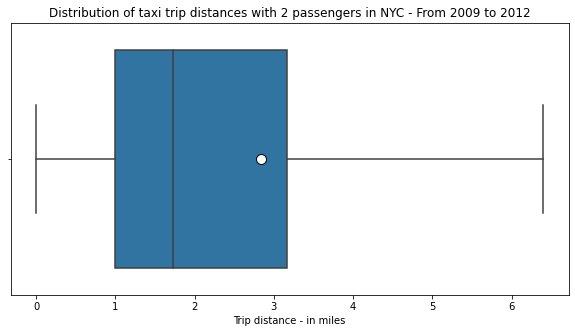

In [9]:
plt.subplots(figsize = (10, 5))

sb.boxplot(x=trip_2, 
           showfliers=False, 
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
          )

plt.title('Distribution of taxi trip distances with 2 passengers in NYC - From 2009 to 2012')
plt.xlabel('Trip distance - in miles')

## Questão 2

*P: Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado?* \
*R: CMT, VTS e DDS, nesta ordem*

In [10]:
df_all.groupby(by=['vendor_id'])['total_amount'].sum().sort_values(ascending=False).round(decimals=2)

vendor_id
CMT    19549084.28
VTS    19043434.00
DDS     2714901.72
TS           45.60
Name: total_amount, dtype: float64

## Questão 3

*Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro*

***Verificando tipos de pagamento existentes na base***

In [11]:
df_all.groupby(by=['payment_type']).sum()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
payment_type,,,,,,,,,,,,,
CASH,3470712,4288936.960,-1.234761e+08,6.803142e+07,0.0,0.0,-1.235193e+08,6.805584e+07,1.525790e+07,516182.0,0.00,175731.28,1.595021e+07
CREDIT,51464,139754.800,-2.895337e+06,1.596294e+06,0.0,0.0,-2.895603e+06,1.596253e+06,4.765129e+05,13714.0,89835.52,11223.60,5.919020e+05
Cash,2203900,3863908.920,-1.127028e+08,6.208899e+07,0.0,0.0,-1.127141e+08,6.209728e+07,1.438497e+07,0.0,2807.08,139628.16,1.453200e+07
Credit,1189400,2380976.812,-5.116695e+07,2.818661e+07,0.0,0.0,-5.118218e+07,2.819501e+07,8.233866e+06,117858.0,1541280.44,165776.72,1.006539e+07
Dispute,3216,7254.000,-1.760482e+05,9.698046e+04,0.0,0.0,-1.760299e+05,9.698445e+04,2.793840e+04,0.0,2.68,578.84,2.892452e+04
No Charge,15600,32005.720,-9.050703e+05,4.986208e+05,0.0,0.0,-9.050237e+05,4.986282e+05,1.365032e+05,0.0,234.36,1439.36,1.390333e+05


***Selecionando dados a serem trabalhados***

In [12]:
cash_trips = df_all.query('payment_type == "CASH" | payment_type == "Cash"')
cash_trips['pickup_datetime'] = pd.to_datetime(cash_trips['pickup_datetime'])
cash_trips = pd.DataFrame(cash_trips['total_amount'].groupby(by=[cash_trips['pickup_datetime'].dt.year, cash_trips['pickup_datetime'].dt.month]).sum())
cash_trips.index = cash_trips.index.set_names(['year', 'month'])
cash_trips

<ipython-input-12-065775bc7417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_trips['pickup_datetime'] = pd.to_datetime(cash_trips['pickup_datetime'])


total_amount
year month              
2009 1         627267.13
     2         625186.60
     3         696467.42
     4         667394.58
     5         698388.04
     6         669432.45
     7         697615.20
     8         697139.14
     9         671736.14
     10        695397.38
     11        670152.72
     12        204377.30
2010 1         622337.46
     2         624890.13
     3         695007.47
     4         671593.76
     5         690537.78
     6         670187.13
     7         690775.09
     8         688273.39
     9         665003.80
     10        692699.55
     11        666169.22
     12        243079.32
2011 1         520871.44
     2         667657.01
     3         734770.64
     4         714801.75
     5         736945.01
     6         711644.71
     7         740846.28
     8         745906.48
     9         715333.65
     10        740357.19
     11        591419.94
2012 1         759740.19
     2         735060.27
     3         783597.32
     4         764028.96
     5         789521.00
     6         760125.42
     7         791345.04
     8         785371.96
     9         766579.46
     10        685184.48

***Criando visualização***

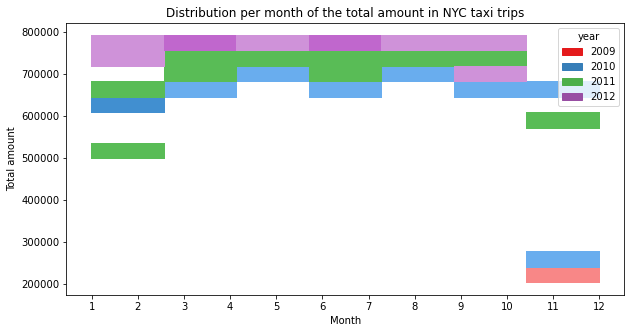

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))

sb.histplot(data=cash_trips, x="month", y="total_amount", hue="year", palette="Set1")
plt.title('Distribution per month of the total amount in NYC taxi trips')
plt.xlabel('Month')
plt.ylabel('Total amount')

#setting x axis interval
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(1))

## Questão 4

*Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012*

***Selecionando dados a serem trabalhados***

In [14]:
last_trips = df_all[df_all['pickup_datetime'].dt.year == int(2012)]
last_trips = last_trips[last_trips['pickup_datetime'].dt.month >= int(8)]
last_trips = last_trips[['pickup_datetime', 'tip_amount']]
last_trips = pd.DataFrame(last_trips.groupby(by=[last_trips['pickup_datetime'].dt.month, last_trips['pickup_datetime'].dt.day]).count())
last_trips.index = last_trips.index.set_names(['month', 'day'])
last_trips

pickup_datetime  tip_amount
month day                             
8     1               3292        3292
      2               3306        3306
      3               3450        3450
      4               3282        3282
      5               3273        3273
...                    ...         ...
10    23              3372        3372
      24              3401        3401
      25              3245        3245
      26              3371        3371
      27              3297        3297

[88 rows x 2 columns]

***Criando visualização***

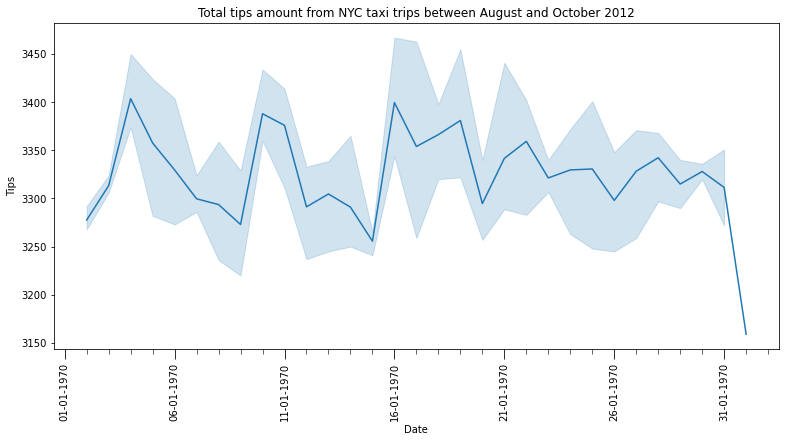

In [15]:
import matplotlib.dates as md

fig, ax = plt.subplots(figsize = (13, 6))

sb.lineplot(data=last_trips, x="day", y="tip_amount")

# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%d-%m-%Y'))

#rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

plt.title('Total tips amount from NYC taxi trips between August and October 2012')
plt.xlabel('Date')
plt.ylabel('Tips')

plt.show()

## Questão 5

*P: Qual o tempo médio das corridas nos dias de sábado e domingo?* \
*R: Aproximadamente 8.74 minutos*

***Criando coluna que representa o dia da semana***

In [16]:
df_all['day_of_week'] = df_all['pickup_datetime'].dt.day_name()
df_all.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,day_of_week
0,CMT,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,NaN,NaN,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4,Tuesday
1,CMT,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,NaN,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4,Tuesday
2,VTS,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,NaN,NaN,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1,Tuesday
3,VTS,2009-09-24 08:28:09.004451+00:00,2009-09-24 08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,NaN,NaN,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4,Thursday
4,VTS,2009-10-29 05:50:39.214629+00:00,2009-10-29 05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,NaN,NaN,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2,Thursday


***Selecionando dados***

In [17]:
weekend_trips = df_all.query('day_of_week == "Saturday" | day_of_week == "Sunday"')
weekend_trips.groupby(by=['day_of_week']).count()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
day_of_week,,,,,,,,,,,,,,,,,
Saturday,567803,567803,567803,567803,567803,567803,567803,0,41,567803,567803,567803,567803,567803,567803,567803,567803
Sunday,564871,564871,564871,564871,564871,564871,564871,0,31,564871,564871,564871,564871,564871,564871,564871,564871


***Acrescentando coluna que representa a duração das viagens em minutos***

In [18]:
weekend_trips['duration'] = ((weekend_trips['dropoff_datetime'] - weekend_trips['pickup_datetime']) / pd.Timedelta(minutes=1)).round(decimals=2)
weekend_trips = weekend_trips[['duration', 'day_of_week']]
weekend_trips

<ipython-input-18-28072d31cd39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_trips['duration'] = ((weekend_trips['dropoff_datetime'] - weekend_trips['pickup_datetime']) / pd.Timedelta(minutes=1)).round(decimals=2)


,duration,day_of_week
10,11.01,Saturday
15,8.86,Sunday
23,8.88,Sunday
25,10.75,Saturday
26,9.13,Saturday
...,...,...
999987,10.10,Sunday
999989,8.79,Sunday
999991,11.90,Saturday
999994,5.33,Sunday


In [19]:
weekend_trips.groupby(by=['day_of_week'])['duration'].mean()

day_of_week
Saturday    8.748997
Sunday      8.744021
Name: duration, dtype: float64

Text(0, 0.5, 'Trip duration')

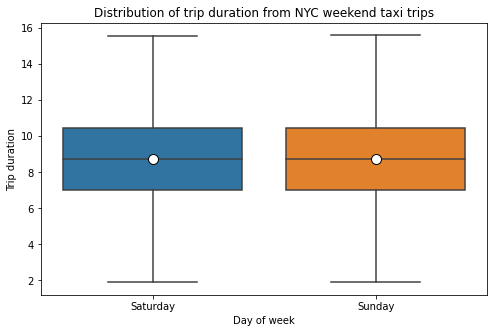

In [20]:
plt.subplots(figsize = (8, 5))

sb.boxplot(data=weekend_trips, 
           x="day_of_week", 
           y="duration", 
           showfliers=False,
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
          )

plt.title('Distribution of trip duration from NYC weekend taxi trips')
plt.xlabel('Day of week')
plt.ylabel('Trip duration')